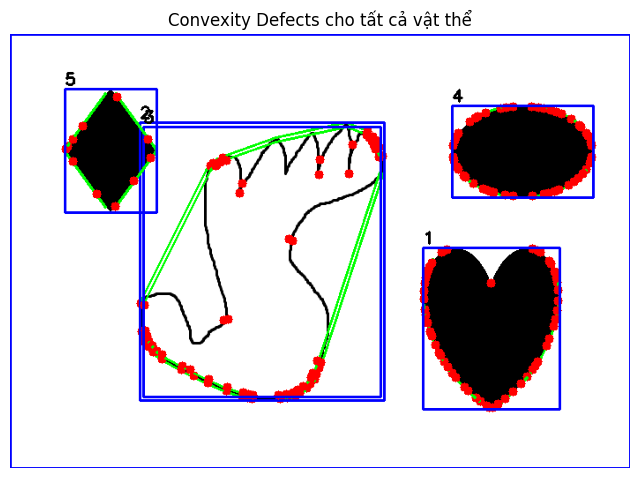

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv.imread(r"D:\Documents\workspace\ThiGiacMayTinh\ComputerVision2025\img\1.png")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(img_gray, 127, 255, 0)

# Tìm contours
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

img_draw = img.copy()

for i, cnt in enumerate(contours):
    # Convex hull & defects
    hull = cv.convexHull(cnt, returnPoints=False)
    defects = cv.convexityDefects(cnt, hull)
    
    if defects is not None:
        for j in range(defects.shape[0]):
            s, e, f, d = defects[j, 0]
            start = tuple(cnt[s][0])
            end = tuple(cnt[e][0])
            far = tuple(cnt[f][0])
            cv.line(img_draw, start, end, (0,255,0), 2)
            cv.circle(img_draw, far, 5, (0,0,255), -1)
    
    # Vẽ bounding box và số thứ tự
    x, y, w, h = cv.boundingRect(cnt)
    cv.rectangle(img_draw, (x, y), (x+w, y+h), (255,0,0), 2)
    cv.putText(img_draw, str(i), (x, y-5), cv.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 2)

plt.figure(figsize=(8,8))
plt.imshow(cv.cvtColor(img_draw, cv.COLOR_BGR2RGB))
plt.title("Convexity Defects cho tất cả vật thể")
plt.axis("off")
plt.show()


In [2]:
# Cấu hình
test_point = (50, 50)
# Xử lý tất cả vật thể
for i, cnt in enumerate(contours):
    print(f"\nContour {i}:")
    
    # Convexity Defects
    hull = cv.convexHull(cnt, returnPoints=False)
    defects = cv.convexityDefects(cnt, hull)
    if defects is not None:
        print(f"  Convexity defects: {defects.shape[0]} points")
    else:
        print("  Convexity defects: None")
    
    # Point Polygon Test
    dist = cv.pointPolygonTest(cnt, test_point, True)
    status = "inside" if dist > 0 else "outside" if dist < 0 else "on the contour"
    print(f"  Distance from point {test_point}: {dist:.2f} → {status}")


Contour 0:
  Convexity defects: None
  Distance from point (50, 50): 50.00 → inside

Contour 1:
  Convexity defects: 54 points
  Distance from point (50, 50): -475.39 → outside

Contour 2:
  Convexity defects: 38 points
  Distance from point (50, 50): -201.00 → outside

Contour 3:
  Convexity defects: 37 points
  Distance from point (50, 50): -205.29 → outside

Contour 4:
  Convexity defects: 50 points
  Distance from point (50, 50): -457.53 → outside

Contour 5:
  Convexity defects: 11 points
  Distance from point (50, 50): -57.01 → outside


Matching star1.png contour 1 with star1.png contour 1 = 0.000000


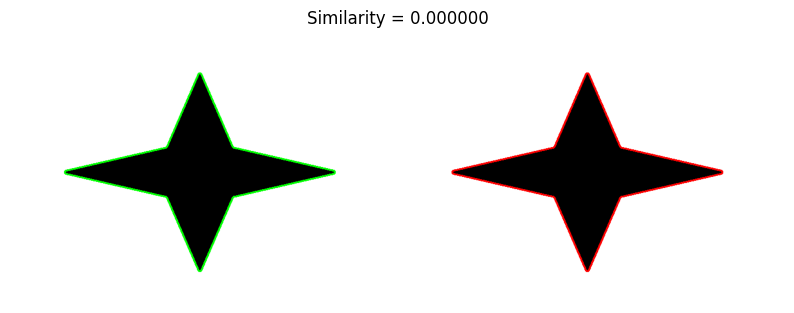

Matching star1.png contour 1 with star2.png contour 1 = 0.321569


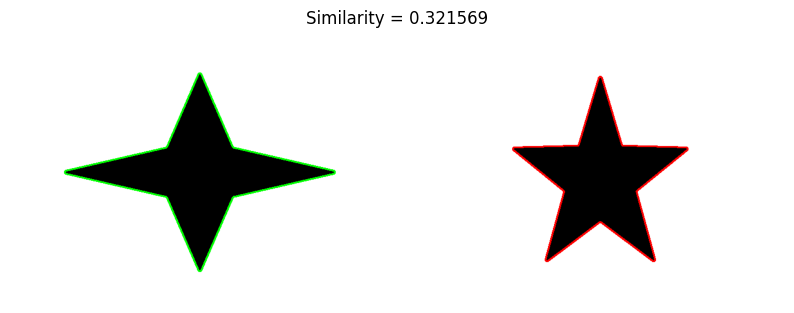

Matching star1.png contour 1 with 3.png contour 1 = 0.592097


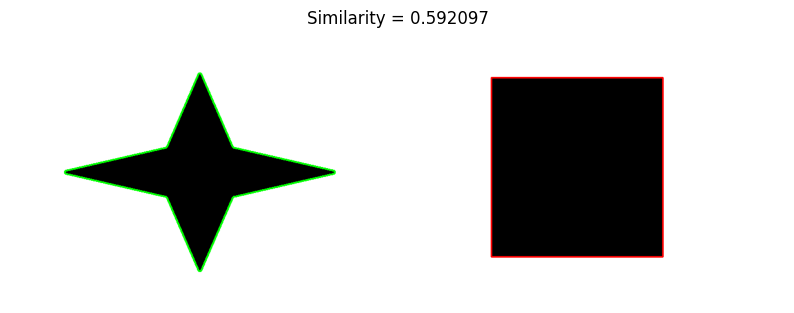

In [3]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

# =============================
# Folder chứa các ảnh để so sánh
# =============================
folder = r"D:\Documents\workspace\ThiGiacMayTinh\ComputerVision2025\img"
files = ["star1.png", "star2.png", "3.png"]

# Hàm lấy contour theo index (bạn chỉ định)
def get_contour(path, idx=0):
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    assert img is not None, f"File {path} không tồn tại!"
    _, thresh = cv.threshold(img, 127, 255, 0)
    contours, _ = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    if idx >= len(contours):
        raise ValueError(f"Index {idx} vượt quá số lượng contour ({len(contours)}) trong {path}")
    return contours[idx], cv.imread(path)  # trả kèm ảnh màu để vẽ

# Chọn index contour muốn so sánh
idxA = 1
idxB = 1

# Lấy contour và ảnh
cntA, imgA = get_contour(os.path.join(folder, files[0]), idxA)

# =============================
# So sánh contour của ảnh A với tất cả ảnh khác
# =============================
for f in files:
    cntB, imgB = get_contour(os.path.join(folder, f), idxB)
    similarity = cv.matchShapes(cntA, cntB, 1, 0.0)
    print(f"Matching {files[0]} contour {idxA} with {f} contour {idxB} = {similarity:.6f}")
    
    # =============================
    # Vẽ contour ra hình
    # =============================
    img_draw = np.hstack((imgA.copy(), imgB.copy()))
    offset = imgA.shape[1]
    cv.drawContours(img_draw, [cntA], -1, (0,255,0), 2)            # xanh lá ảnh A
    cntB_shifted = cntB + [offset,0]
    cv.drawContours(img_draw, [cntB_shifted], -1, (0,0,255), 2)    # đỏ ảnh B

    plt.figure(figsize=(10,5))
    plt.imshow(cv.cvtColor(img_draw, cv.COLOR_BGR2RGB))
    plt.title(f"Similarity = {similarity:.6f}")
    plt.axis("off")
    plt.show()


In [ ]:
s